# 分段优化 远场(-25, 0)度

利用逆向设计分段优化(-25, 0)度的远场分布，0度远场分布最大，-25度远场最小。
1. 远场角度每一个角度进行分段
2. cell unit 长度 $ 5\mu m $，resolution为20 nm，cell unit包含250个优化单元
3. 以5度为一个分段，将(-25, 0)度分段为-20, -15, -10, -5, 0度
4. 每一个cell对一个远场angle进行优化

设置目标函数为J1: 远场在目标角度范围最大化；J2: 出射波导中的flux随角度变大逐渐下降

In [27]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.style.use("seaborn")


# 返回每一个角度输出波导的flux值
# def get_angle_flux(start_angle=0, stop_angle=-25):

start_angle = 0
stop_angle = -25
d_angle = 5
# angles -> [-20, -15, -10, -5, 0]
angles = np.array([-20, -15, -10, -5, 0])

# -dP/dZ = S
# directional = const
input_P = 1

P_angles_in = []
P_angles_out = []  # 不同角度时波导输出强度
P_angles_scatter = np.zeros(shape=angles.shape)  # 不同角度的散射强度

P_angles_scatter[0] = 0
# 设置-25度时散射强度为0，0度时散射强度最大
P_num = np.sum(range(1, angles.shape[0] + 1, 1))
P_temp = 1
for ii in range(0, angles.shape[0], 1):
    P_angles_in.append(P_temp)
    P_angles_scatter[ii] = input_P / P_num * (ii+1)
    P_temp = P_temp - P_angles_scatter[ii]
    P_angles_out.append(P_temp)

print(np.sum(P_angles_scatter))
print(P_angles_scatter.shape)
np.save('P_angles_scatter.npy', P_angles_scatter)

1.0
(5,)


/tmp/ipykernel_46320/2969117182.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


([<matplotlib.axis.XTick at 0x7f86c98b9950>,
 [Text(-20, 0, '−20'),
  Text(-15, 0, '−15'),
  Text(-10, 0, '−10'),
  Text(-5, 0, '−5'),
  Text(0, 0, '0')])

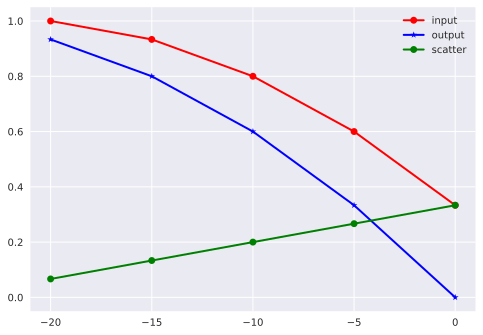

In [28]:
plt_in = plt.plot(angles, P_angles_in, "-or", label="input", linewidth=2)
plt_out = plt.plot(angles, P_angles_out, "-*b", label="output", linewidth=2)
plt_scatter = plt.plot(angles, P_angles_scatter, "-og", label="scatter", linewidth=2)
plt.legend(loc="best")
plt.xticks(angles)

In [37]:
np.sum(P_angles_scatter)

1.0